In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [2]:
sample_size=10
simulated_data = np.mean(tf.random.uniform([10000,sample_size],0,1),axis=1)
simulated_data.shape

(10000,)

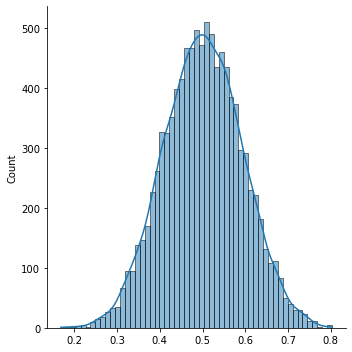

In [3]:
sn.displot(simulated_data,kde=True)

The distribution tends to a normal distribution. This is caused by the central limit theory. Most of the mass of the distribution is on a half. 

The standard deviation of this distribution is sigma/sqrt(n). This is the standard error. 

size= 30; mean = 18 

Null hypothesis: sample drawn from a normal distribution with mean 15; std. 5

Evaluate whether that's a plausible trend or not. The way to do it is to simulate it. 

In [4]:
simulated_data = np.mean(tf.random.normal([10000,30],15,5),axis=1) # we draw from the normal distribution 15,5 10000 experiments, 30 each

How plausible is this outcome given my hypothesis?
We test how plausible it is that my null hypothesis is above 18

In [5]:
np.sum(simulated_data > 18)/ len(simulated_data)

0.0005

What does the number tell us? The probability that you get a value targer than 18 is .02%

# Bootstrapping

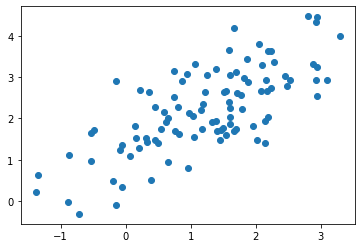

In [6]:
mean = [1,2]
cov = [[1,0.6],[0.6,1]]
n = 100
x= np.random.multivariate_normal(mean, cov,(n))
plt.scatter(x[:,0],x[:,1]); #all the rows and first element; all the rows and second element

If you draw a high value of x, you'll get high values of y

## find the slope on the data

In [7]:
sm.OLS(x[:,1],sm.add_constant(x[:,0])).fit().params

array([1.36236066, 0.69818643])

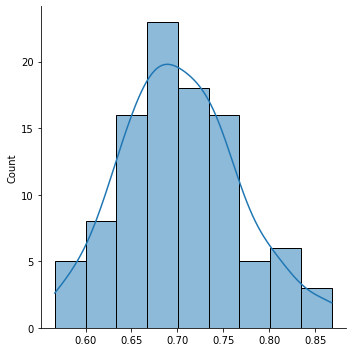

In [8]:
slopes = []
for i in np.arange(100):
    sample = np.random.choice(n,size=n, replace=True)
    slopes.append(sm.OLS(x[:,1][sample],sm.add_constant(x[:,0][sample])).fit().params[1]) #index 1 is the slope
sn.displot(slopes,kde=True);

Program a null hypothesis test that the slope is actually 0

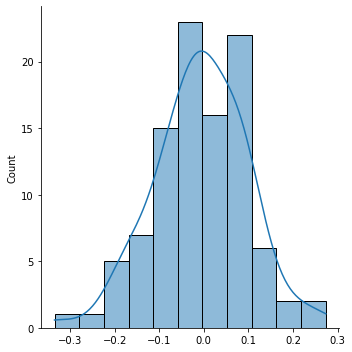

In [9]:
slopes_0 = []
for i in np.arange(100):
    sample_x = np.random.choice(n,size=n, replace=True)
    sample_y = np.random.choice(n,size=n, replace=True)
    slopes_0.append(sm.OLS(x[:,1][sample_y],sm.add_constant(x[:,0][sample_x])).fit().params[1]) #my slopes under the null hypothesis
sn.displot(slopes_0,kde=True);

# Next week 

In [10]:
nobs = 100

X = np.random.random((nobs,20))
X = sm.add_constant(X)
beta = np.zeros(21)
e = np.random.random(nobs) # I just need one error term
y = np.dot(X,beta) + e
results = sm.OLS(y,X).fit()
np.sum(results.pvalues<0.05)

3

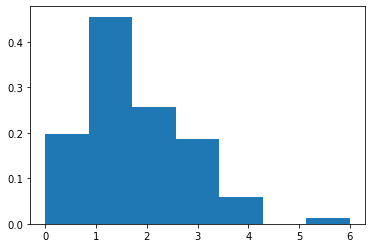

In [11]:
signif_variables = []
for i in range(100):
    X = np.random.random((nobs,20))
    X = sm.add_constant(X)
    beta = np.zeros(21)
    e = np.random.random(nobs) 
    y = np.dot(X,beta) + e
    results = sm.OLS(y,X).fit()
    signif_variables.append(np.sum(results.pvalues<0.05))
plt.hist(signif_variables,bins=7, density = True);

# matrices

In [12]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [13]:
b = np.array ([3,5]).reshape(2,1)
c = np.array ([3,5]).reshape(1,2) # this reshape is not needed because by default is 1,2

In [14]:
b

array([[3],
       [5]])

In [15]:
c

array([[3, 5]])

In [16]:
np.dot(A,b)

array([[13],
       [29]])

In [17]:
A @ b # diffrent notation if we don't want to use .dot

array([[13],
       [29]])

In [18]:
A*b # this gives a compeletely different result

array([[ 3,  6],
       [15, 20]])

In [19]:
A*c

array([[ 3, 10],
       [ 9, 20]])

In [20]:
A @ c # I get an error because the mn +nk = mk is not satisfied

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)